## Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

## Loading the Dataset

In [19]:
data = fetch_california_housing()
x = data.data
y = data.target

## Feature Engineering

In [21]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [22]:
rooms_per_person = x[:, 3] / (x[:, 4] + 1e-5)
population_per_household = x[:, 4] / (x[:, 5] + 1e-5)
income_per_person = x[:, 0] / (x[:, 4] + 1e-5)
avg_rooms = x[:, 2] / (x[:, 5] + 1e-5)
avg_bedrooms = x[:, 3] / (x[:, 5] + 1e-5)

## Adding New Features

In [23]:
x = np.hstack([
    x,
    rooms_per_person.reshape(-1, 1),
    population_per_household.reshape(-1, 1),
    income_per_person.reshape(-1, 1),
    avg_rooms.reshape(-1, 1),
    avg_bedrooms.reshape(-1, 1)
])

In [48]:
columns=data.feature_names+([
    'rooms_per_person',
    'population_per_household',
    'income_per_person',
    'avg_rooms',
    'avg_bedrooms'
])

df=pd.DataFrame(x,columns=columns)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  rooms_per_person  population_per_household  income_per_person  \
0    -122.23          0.003180                125.999507           0.025855   
1    -122.22          0.000405               1137.994606           0.003457   
2    -122.24          0.002164                176.999368           0.014632   
3    -122.25          0.001923                218.999140           0.010113   
4    -122.25          0.001913                258.998813           0.006807   

   avg_rooms  avg_bedrooms  
0   2.732909      0.400620  
1   2.9566

## Splitting the data into Training and Testing

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Normalizing Features

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Building the DNN model

In [26]:
model = Sequential([

    Dense(1024, activation='relu', input_shape=(x_train.shape[1],)), 
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(512, activation='relu'),  # Hidden layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),  # Hidden layer 2
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),  # Hidden layer 3
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu'),  # Hidden layer 4
    BatchNormalization(),
    Dropout(0.05),

    Dense(32, activation='relu'),  # Hidden layer 5
    BatchNormalization(),
    Dropout(0.04),

    Dense(16, activation='relu'),  # Hidden layer 6
    BatchNormalization(),
    Dropout(0.01),

    Dense(8, activation='relu'),  # Hidden layer 7
    BatchNormalization(),
    Dropout(0.01),

    Dense(4, activation='relu'),  # Hidden layer 8
    BatchNormalization(),
    Dropout(0.01),

    Dense(1,activation='linear')  
])

C:\python3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the Model

In [27]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

## Train the Model

In [29]:
history=model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 7.9180 - mae: 2.3757 - val_loss: 9.1466 - val_mae: 2.8103
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5.2473 - mae: 1.9679 - val_loss: 5.2132 - val_mae: 2.0625
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 4.1749 - mae: 1.7737 - val_loss: 3.8183 - val_mae: 1.7689
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.3711 - mae: 1.5854 - val_loss: 2.9587 - val_mae: 1.5336
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.8217 - mae: 1.4318 - val_loss: 2.3901 - val_mae: 1.3617
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.3325 - mae: 1.2840 - val_loss: 1.8806 - val_mae: 1.1877
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.9303 - mae: 1.1436 - val_loss: 1.4716 - val_mae: 1.0132
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.5177 - mae: 0.9846 - val_loss: 1.1796 - val_mae: 0.8686
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 11

## Evaluate the Model

In [30]:
loss,mae = model.evaluate(x_test, y_test)
print(f"\nMAE: {mae:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2630 - mae: 0.3594

MAE: 0.36


## Plotting of Graph

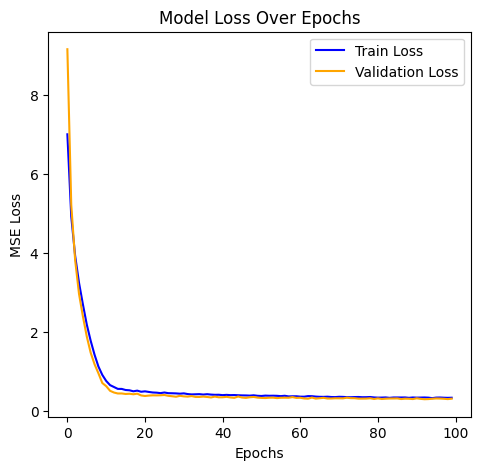

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

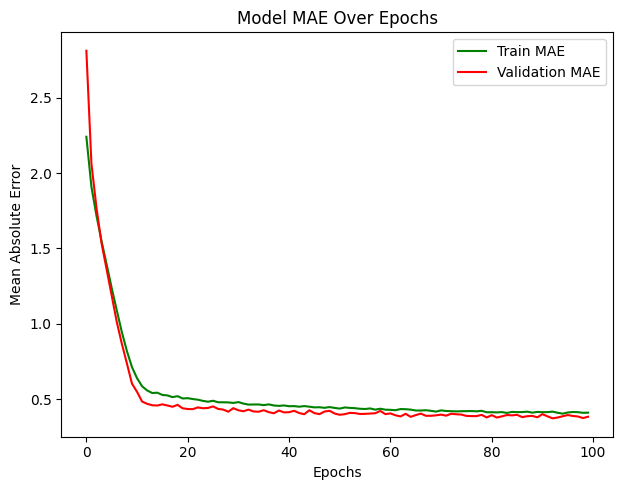

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', color='green')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()